In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\UCI_Credit_Card.csv")

In [3]:
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


The above summary shows there are no missing values or duplicates
Our target variable that we will be predicting is the "default payment next
month" column, and all other columns will be features.

In [4]:
train_features = data.drop(['default.payment.next.month'], axis=1)  
train_target = data['default.payment.next.month']

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lr_sklearn = LogisticRegression(random_state=42)
lr_sklearn.fit(train_features, train_target)

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [7]:
lr_sklearn.score(train_features, train_target)

0.7787666666666667

In [8]:
train_target.value_counts(normalize=True)

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [9]:
prediction = lr_sklearn.predict(train_features.iloc[-1].values.reshape(1,-1))
print(prediction)


[0]


c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
#to get probabiites of all the predictions
lr_sklearn.predict_proba(train_features)

array([[0.52829806, 0.47170194],
       [0.62313842, 0.37686158],
       [0.63307546, 0.36692454],
       ...,
       [0.73574074, 0.26425926],
       [0.96991308, 0.03008692],
       [0.73630216, 0.26369784]])

In [11]:
proba_predictions = lr_sklearn.predict_proba(train_features)[:,1]
proba_predictions = (proba_predictions >= 0.5).astype('int')
print(proba_predictions)

[0 0 0 ... 0 0 0]


In [12]:
import numpy as np

In [13]:
predictions = lr_sklearn.predict(train_features)
np.array_equal(predictions, np.round(proba_predictions))

True

In [14]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


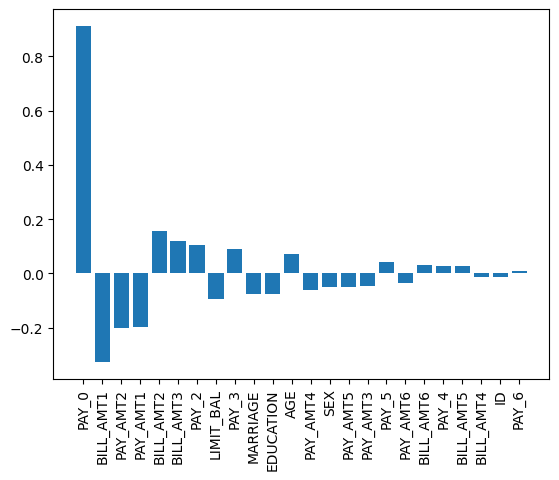

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features)
scaled_lr_model = LogisticRegression(random_state=42)
scaled_lr_model.fit(scaled_features, train_target)
logit_coef = np.exp(scaled_lr_model.coef_[0]) - 1
idx = abs(logit_coef).argsort()[::-1]
plt.bar(range(len(idx)), logit_coef[idx])
plt.xticks(range(len(idx)), train_features.columns[idx],rotation=90)
plt.show()

In [16]:
import statsmodels.api as sm

In [17]:
import numpy as np
np.random.seed(42)
lr_model = sm.Logit(train_target, train_features)
lr_results = lr_model.fit()
lr_results.summary()

Optimization terminated successfully.
         Current function value: 0.465114
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29976
Method:                                   MLE   Df Model:                           23
Date:                        Mon, 24 Mar 2025   Pseudo R-squ.:                  0.1198
Time:                                19:35:49   Log-Likelihood:                -13953.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID          -3.27e-06   1.71e-06     -1.911      0.056   -6.62e-06    8.44e-08
LIMIT_BAL  -9.074e-07   1.55e-07     -5.845      0.000   -1.21e-06   -6.03e-07
SEX           -0.1897      0.027     -7.084      0.000      -0.242      -0.137
EDUCATION     -0.1345      0.020     -6.650      0.000      -0.174      -0.095
MARRIAGE      -0.2753      0.023    -11.942      0.000      -0.320      -0.230
AGE            0.0010      0.001      0.728      0.466      -0.002       0.004
PAY_0          0.5728      0.018     32.409      0.000       0.538       0.607
PAY_2          0.0811      0.020      4.020      0.000       0.042       0.121
PAY_3          0.0693      0.023      3.069      0.002       0.025       0.114
PAY_4          0.0264      0.025      1.058      0.290      -0.023       0.075
PAY_5          0.0321      0.027      1.194      0.232      -0.021       0.085
PAY_6          0.0094      0.022      0.426      0.670      -0.034       0.053
BILL_AMT1  -5.575e-06   1.14e-06     -4.883      0.000   -7.81e-06   -3.34e-06
BILL_AMT2   2.334e-06   1.51e-06      1.541      0.123   -6.34e-07     5.3e-06
BILL_AMT3   1.438e-06   1.33e-06      1.081      0.280   -1.17e-06    4.04e-06
BILL_AMT4   3.581e-08   1.35e-06      0.026      0.979   -2.62e-06    2.69e-06
BILL_AMT5   4.243e-07   1.53e-06      0.277      0.782   -2.58e-06    3.43e-06
BILL_AMT6   4.268e-07   1.21e-06      0.354      0.724   -1.94e-06    2.79e-06
PAY_AMT1   -1.402e-05   2.33e-06     -6.016      0.000   -1.86e-05   -9.45e-06
PAY_AMT2   -9.908e-06   2.11e-06     -4.688      0.000   -1.41e-05   -5.77e-06
PAY_AMT3   -2.769e-06   1.73e-06     -1.600      0.110   -6.16e-06    6.22e-07
PAY_AMT4   -3.987e-06   1.79e-06     -2.225      0.026    -7.5e-06   -4.75e-07
PAY_AMT5   -3.364e-06   1.79e-06     -1.878      0.060   -6.88e-06    1.47e-07
PAY_AMT6   -2.085e-06    1.3e-06     -1.606      0.108   -4.63e-06    4.59e-07
==============================================================================
"""

In [18]:
pvalues = lr_results.pvalues
pvalues = pvalues.reindex(sm.add_constant(train_features).columns)
selected_features = sm.add_constant(train_features).loc[:, pvalues < 0.05]
lr_model_trimmed = sm.Logit(train_target, selected_features)
lr_trimmed_results = lr_model_trimmed.fit()
lr_trimmed_results.summary()

Optimization terminated successfully.
         Current function value: 0.466015
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29989
Method:                                   MLE   Df Model:                           10
Date:                        Mon, 24 Mar 2025   Pseudo R-squ.:                  0.1181
Time:                                19:35:50   Log-Likelihood:                -13980.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -1.044e-06   1.43e-07     -7.308      0.000   -1.32e-06   -7.64e-07
SEX           -0.1914      0.025     -7.589      0.000      -0.241      -0.142
EDUCATION     -0.1380      0.017     -8.102      0.000      -0.171      -0.105
MARRIAGE      -0.2874      0.022    -12.816      0.000      -0.331      -0.243
PAY_0          0.5883      0.018     33.603      0.000       0.554       0.623
PAY_2          0.0821      0.020      4.125      0.000       0.043       0.121
PAY_3          0.1191      0.018      6.484      0.000       0.083       0.155
BILL_AMT1  -1.759e-06   2.65e-07     -6.625      0.000   -2.28e-06   -1.24e-06
PAY_AMT1   -1.205e-05    2.1e-06     -5.730      0.000   -1.62e-05   -7.93e-06
PAY_AMT2   -8.389e-06   1.81e-06     -4.634      0.000   -1.19e-05   -4.84e-06
PAY_AMT4   -4.517e-06   1.56e-06     -2.900      0.004   -7.57e-06   -1.46e-06
==============================================================================
"""

In [19]:
lr_trimmed_results.predict(selected_features)


0        0.560231
1        0.141794
2        0.195553
3        0.244711
4        0.129879
           ...   
29995    0.149471
29996    0.101418
29997    0.850581
29998    0.176543
29999    0.281722
Length: 30000, dtype: float64

In [20]:
predictions = (lr_trimmed_results.predict(selected_features) > 0.5).astype('int')

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(predictions, train_target)

0.8097333333333333